In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
import category_encoders as ce

In [109]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [9]:
data=pd.read_csv('train.csv')

In [10]:
print("total deliquent",np.count_nonzero(data.m13))
print("total non deliquent",data.shape[0]-np.count_nonzero(data.m13))

print("% data deliquent ",np.count_nonzero(data.m13)/float(data.shape[0])*100)

print("% data non deliquent ",(data.shape[0]-np.count_nonzero(data.m13))/float(data.shape[0])*100)

print("deliquent par non deliquent",np.count_nonzero(data.m13)/float(data.shape[0]-np.count_nonzero(data.m13)))


('total deliquent', 636)
('total non deliquent', 115422)
('% data deliquent ', 0.5480018611383963)
('% data non deliquent ', 99.45199813886161)
('deliquent par non deliquent', 0.005510214690440297)


In [8]:
#data=data.drop(columns=['loan_id','first_payment_date','origination_date'])

In [316]:
# sns.boxplot(data.interest_rate)

In [94]:
# data=data[data['interest_rate']<5].reset_index(drop=True)
# data=data[data['interest_rate']>2.75].reset_index(drop=True) # we cant remove outlayer we loss 100 sample of 1

In [96]:
# data=data[data['unpaid_principal_bal']<500000].reset_index(drop=True) ## we can remove outlayer

In [97]:
# data=data[data['loan_to_value']>20].reset_index(drop=True) ## we can remove outlayer

In [98]:
# data=data[data['borrower_credit_score']>700].reset_index(drop=True) ## we can remove outlayer

In [360]:
data.shape

(116058, 26)

In [6]:
cateogrical_columns=['financial_institution',
 'first_payment_date','loan_id',
 'loan_purpose',
 'origination_date',
 'source']

In [361]:
one=ce.OneHotEncoder(handle_unknown="ignore",use_cat_names=True)
x_one=one.fit_transform(data)

In [11]:
data=data.drop(columns=cateogrical_columns)

In [107]:
X_train, X_test = train_test_split(data, test_size=0.1, random_state=142)

In [108]:
X_train=X_train[X_train['m13']==0]
X_train=X_train.drop(columns=['m13'])

In [110]:
input_dim = X_train.shape[1]
encoding_dim = 10

In [111]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(10), activation="relu")(encoder)


decoder = Dense(input_dim, activation='relu')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [112]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 22)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                230       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 22)                242       
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [113]:
from sklearn import preprocessing

In [114]:
mean=X_train.mean()
std=X_train.std()
XX_train=(X_train-mean)/std

In [115]:
XX_train=(X_train-mean)/std

In [116]:
XX_train.shape

(103885, 22)

In [117]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [118]:
# from keras import backend as K

# def root_mean_squared_error(y_true, y_pred):
#         return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [119]:
nb_epoch = 50
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7,
                              patience=2, min_lr=0.00001, verbose=1)


checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(XX_train,XX_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[checkpointer, tensorboard,reduce_lr,earlystopper]).history

Train on 83108 samples, validate on 20777 samples
Epoch 1/50
83108/83108 [==============================] - 3s 41us/step - loss: 0.8347 - acc: 0.6654 - val_loss: 0.6752 - val_acc: 0.8443
Epoch 2/50
83108/83108 [==============================] - 3s 40us/step - loss: 0.7146 - acc: 0.8628 - val_loss: 0.6055 - val_acc: 0.8756
Epoch 3/50
83108/83108 [==============================] - 3s 40us/step - loss: 0.6617 - acc: 0.8789 - val_loss: 0.5644 - val_acc: 0.8881
Epoch 4/50
83108/83108 [==============================] - 4s 42us/step - loss: 0.6212 - acc: 0.8815 - val_loss: 0.5362 - val_acc: 0.8798
Epoch 5/50
83108/83108 [==============================] - 3s 40us/step - loss: 0.5957 - acc: 0.8828 - val_loss: 0.5163 - val_acc: 0.8908
Epoch 6/50
83108/83108 [==============================] - 3s 41us/step - loss: 0.5816 - acc: 0.8824 - val_loss: 0.5099 - val_acc: 0.8941
Epoch 7/50
83108/83108 [==============================] - 3s 42us/step - loss: 0.5694 - acc: 0.8858 - val_loss: 0.5073 - val_acc

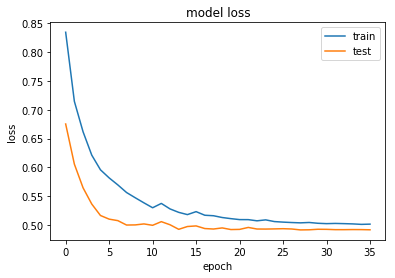

In [252]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [463]:
# autoencoder = load_model('model.h5')

In [121]:
target=X_test['m13']
X_test1=X_test.drop(columns='m13')

In [122]:
mean1=X_test1.mean()
std1=X_test1.std()
X_test1=(X_test1-mean1)/std1

In [123]:
predictions = autoencoder.predict(X_test1)

In [124]:
mse = np.mean(np.power(X_test1 - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': X_test['m13']})

In [125]:
xx=error_df[error_df['true_class']==1]

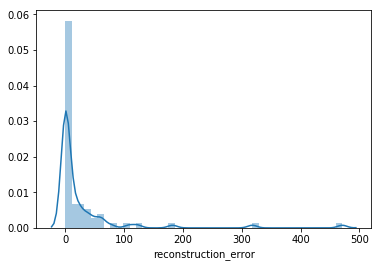

In [126]:
sns.distplot(xx['reconstruction_error'])

In [379]:
#error_df[error_df['true_class']==0]

In [248]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# normal_error_df = error_df[(error_df['true_class']== 0)]
# _ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

In [247]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# normal_error_df = error_df[(error_df['true_class']== 1)]
# _ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

In [139]:
ax.hist?

In [61]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

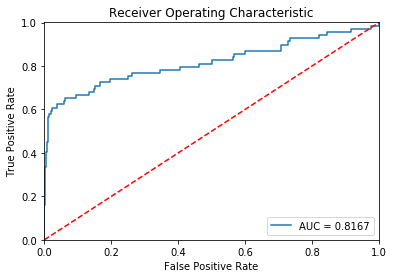

In [129]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [254]:
# precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
# plt.plot(recall, precision, 'b', label='Precision-Recall curve')
# plt.title('Recall vs Precision')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.show()

In [253]:
# plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
# plt.title('Precision for different threshold values')
# plt.xlabel('Threshold')
# plt.ylabel('Precision')
# plt.show()

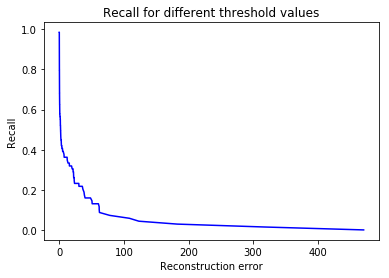

In [132]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [260]:
thr=15.2789

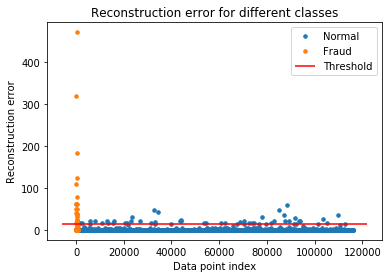

In [261]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(thr, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

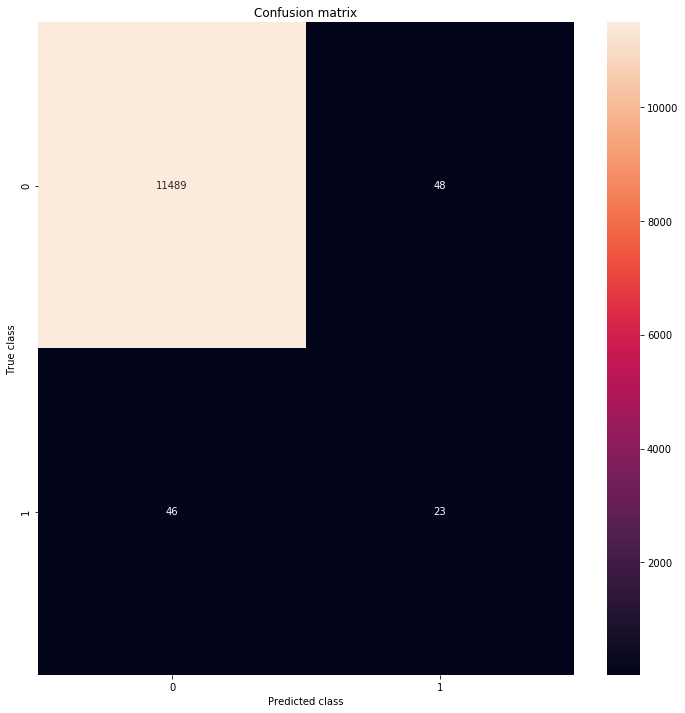

In [262]:
y_pred = [1 if e > thr else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix ,annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [263]:
print(classification_report(error_df.true_class, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11537
           1       0.32      0.33      0.33        69

   micro avg       0.99      0.99      0.99     11606
   macro avg       0.66      0.66      0.66     11606
weighted avg       0.99      0.99      0.99     11606



In [233]:
TEST=pd.read_csv("test.csv")
Test=TEST.drop(columns=cateogrical_columns)

In [235]:
mean1=Test.mean()
std1=Test.std()
Test=(Test-mean1)/std1

In [236]:
predictions1 = autoencoder.predict(Test)

In [241]:
mse = np.mean(np.power(Test - predictions1, 2), axis=1)
error_df1 = pd.DataFrame({'reconstruction_error': mse})

In [242]:
error_df1.reconstruction_error[error_df1.reconstruction_error<=thr]=0
error_df1.reconstruction_error[error_df1.reconstruction_error>thr]=1


In [243]:
error_df1=error_df1.astype('int')

In [244]:
error_df1.sum()

reconstruction_error    126
dtype: int64

In [444]:
sub=pd.DataFrame()
sub['loan_id']=TEST.loan_id
sub['m13']=error_df1
sub.to_csv("encoder.csv",index=False)